# 1.2.4.4 Challenge - Make Your Own Regression Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [2]:
data = pd.read_csv('FBI Crime Data 2013.csv')
data.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


In [3]:
# Data cleaning

# Rename columns
data.columns = [['City', 'Population', 'Violent Crime', 'Murder', 'Rape1', 'Rape2', 'Robbery', 'Agg Assault', 'Property Crime',
                'Burglary', 'Larceny', 'Vehicle Theft', 'Arson']]

cols = ['Population', 'Violent Crime', 'Murder', 'Rape1', 'Rape2', 'Robbery', 'Agg Assault', 'Property Crime',
        'Burglary', 'Larceny', 'Vehicle Theft', 'Arson']

# Replace all NaN with 0
data[cols] = data[cols].replace(np.nan, 0)

In [4]:
# Add New Boolean columns for Murder and Robbery
data['PopSq'] = data['Population'] ** 2
data['MurderBool'] = np.where((data['Murder'] >= 1), 1, 0)
data['RobberyBool'] = np.where((data['Robbery'] >= 1), 1, 0)

In [5]:
data.head()

,City,Population,Violent Crime,Murder,Rape1,Rape2,Robbery,Agg Assault,Property Crime,Burglary,Larceny,Vehicle Theft,Arson,PopSq,MurderBool,RobberyBool
0,Adams Village,1861,0,0,0.0,0,0,0,12,2,10,0,0.0,3463321,0,0
1,Addison Town and Village,2577,3,0,0.0,0,0,3,24,3,20,1,0.0,6640929,0,0
2,Akron Village,2846,3,0,0.0,0,0,3,16,1,15,0,0.0,8099716,0,0
3,Albany,97956,791,8,0.0,30,227,526,4090,705,3243,142,0.0,9595377936,1,1
4,Albion Village,6388,23,0,0.0,3,4,16,223,53,165,5,0.0,40806544,0,1


## Version 1 

In [13]:
# Instantiate and fit the model using the three new features just created.
regr = linear_model.LinearRegression()
Y = data['Property Crime'].values.reshape(-1, 1)
X = data[['PopSq', 'MurderBool', 'RobberyBool']]
regr.fit(X, Y)

print('Coefficients: \n', regr.coef_)
print('\nIntercept:  \n', regr.intercept_)
print('\nR-Squared:')
print((regr.score(X, Y) * 100).round(3),'%')

Coefficients: 
 [[1.99256120e-09 1.18406016e+03 3.00052598e+02]]

Intercept:  
 [40.08610471]

R-Squared:
98.599 %


The intercept feels a bit high. Try winsorizing the population and running the model again.

## Version 2 

In [61]:
# Filter out the cities that contain population sizes of 150,000 or greater.
datapop150k = data.loc[(data['Population'] < 150000).all(axis=1) | data.isnull().any(axis=1)]
 
# Which cities did we remove?
datapop150kremoved = data.loc[(data['Population'] > 150000).all(axis=1) | data.isnull().any(axis=1)]
datapop150kremoved

,City,Population,Violent Crime,Murder,Rape1,Rape2,Robbery,Agg Assault,Property Crime,Burglary,Larceny,Vehicle Theft,Arson,PopSq,MurderBool,RobberyBool
35,Buffalo,258789,3249,47,0.0,145,1322,1735,12491,3458,8076,957,0.0,66971746521,1,1
216,New York,8396126,52384,335,0.0,1112,19170,31767,141971,16606,117931,7434,0.0,70494931807876,1,1
272,Rochester,210562,2107,42,0.0,92,918,1055,10051,2587,6855,609,132.0,44336355844,1,1
346,Yonkers,199134,1036,6,0.0,25,390,615,2368,470,1662,236,10.0,39654349956,1,1


In [53]:
# Instantiate and fit the model using the same three features but with the new filtered dataset.
regr = linear_model.LinearRegression()
Y = datapop150k['Property Crime'].values.reshape(-1, 1)
X = datapop150k[['PopSq', 'MurderBool', 'RobberyBool']]
regr.fit(X, Y)

print('Coefficients: \n', regr.coef_)
print('\nIntercept:  \n', regr.intercept_)
print('\nR-Squared:')
print((regr.score(X, Y) * 100).round(3),'%')

Coefficients: 
 [[2.58074999e-07 2.68987266e+02 1.72051347e+02]]

Intercept:  
 [35.60072669]

R-Squared:
77.871 %


The intercept did decrease by a small amount but R-Squared dropped significantly as well. Try again using other features.

## Version 3

In [62]:
# Instantiate and fit the model using four different features - PopSq, Burglary, Larceny, and Vehicle Theft.
regr = linear_model.LinearRegression()
Y = datapop150k['Property Crime'].values.reshape(-1, 1)
X = datapop150k[['PopSq', 'Burglary', 'Larceny', 'Vehicle Theft']]
regr.fit(X, Y)

print('Coefficients: \n', regr.coef_)
print('\nIntercept:  \n', regr.intercept_)
print('\nR-Squared:')
print((regr.score(X, Y) * 100).round(3),'%')

Coefficients: 
 [[5.4527746e-21 1.0000000e+00 1.0000000e+00 1.0000000e+00]]

Intercept:  
 [-3.0127012e-12]

R-Squared:
100.0 %


While the intercept dropped significantly, this model seems to be overfitted having an R-Squared of 100%. This must have occurred being that __Property Crime__ is just an aggregate sum of three of the four features the model used.<br><br>
Plot each feature to see their correlation with the outcome feature, __Property Crime,__ and try again using features that would not overfit the model.

## Version 4

Text(0.5,1,'Agg Assault')

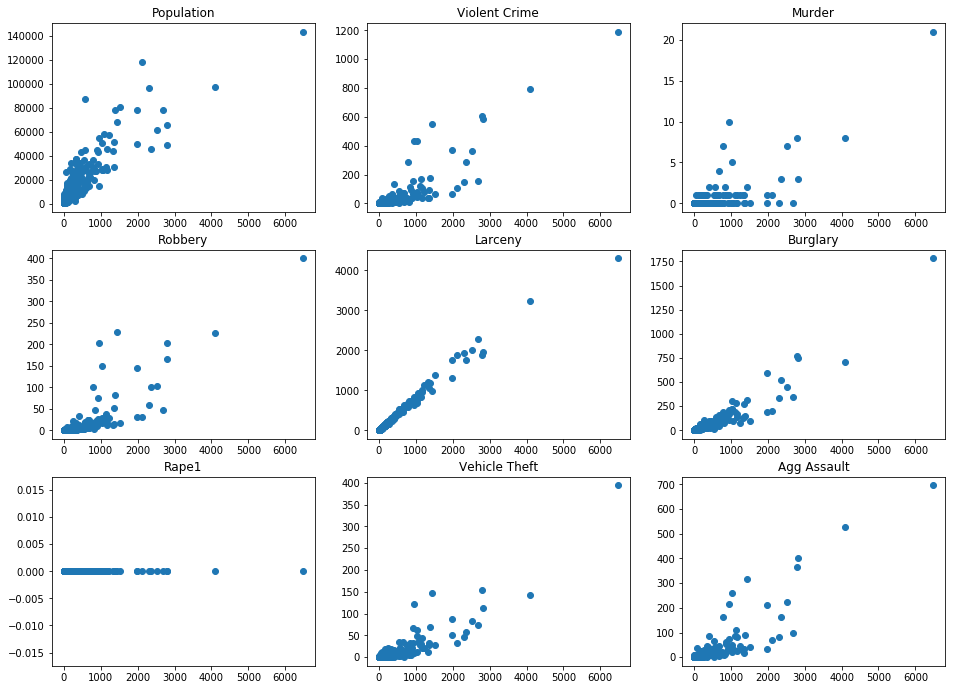

In [71]:
# Create a variable called for the outcome feature values
outcome = datapop150k['Property Crime']

plt.figure(figsize=(16,16))

#Population
plt.subplot(4, 3, 1)
plt.scatter(outcome, datapop150k['Population'])
plt.title('Population')

#Violent crime
plt.subplot(4, 3, 2)
plt.scatter(outcome, datapop150k['Violent Crime'])
plt.title('Violent Crime')

#Murder
plt.subplot(4, 3, 3)
plt.scatter(outcome, datapop150k['Murder'])
plt.title('Murder')

#Robbery
plt.subplot(4, 3, 4)
plt.scatter(outcome, datapop150k['Robbery'])
plt.title('Robbery')

#Larceny-Theft
plt.subplot(4, 3, 5)
plt.scatter(outcome, datapop150k['Larceny'])
plt.title('Larceny')

#Burglary
plt.subplot(4, 3, 6)
plt.scatter(outcome, datapop150k['Burglary'])
plt.title('Burglary')

#Rape
plt.subplot(4, 3, 7)
plt.scatter(outcome, datapop150k['Rape1'])
plt.title('Rape1')

#Motor vehicle theft
plt.subplot(4, 3, 8)
plt.scatter(outcome, datapop150k['Vehicle Theft'])
plt.title('Vehicle Theft')

#Aggravated Assault
plt.subplot(4, 3, 9)
plt.scatter(outcome, datapop150k['Agg Assault'])
plt.title('Agg Assault')

In [67]:
# Instantiate and fit the model using four different features - Population, Rape2, Robbery, and Agg Assault.
regr = linear_model.LinearRegression()
Y = datapop150k['Property Crime'].values.reshape(-1, 1)
X = datapop150k[['Population', 'Rape2', 'Robbery', 'Agg Assault']]
regr.fit(X, Y)

print('Coefficients: \n', regr.coef_)
print('\nIntercept:  \n', regr.intercept_)
print('\nR-Squared:')
print((regr.score(X, Y) * 100).round(3),'%')

Coefficients: 
 [[ 1.56947789e-02  3.02487784e+01 -2.28788258e+00  3.94349226e+00]]

Intercept:  
 [-20.88055333]

R-Squared:
91.455 %


Our new intercept is now significantly lower, implying that our model is accounting far a larger variance in the data. Additionally, the R-Squared is quite impressive at over 91%.<br><br>
This looks like a model I would feel comfortable to use.